In [11]:
# %load paperFigs_events.py
from hydroDL import pathSMAP, master, utils
from hydroDL.master import default
from hydroDL.post import plot, stat
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib

doLst = list()
# doLst.append('train')
doLst.append('test')
doLst.append('post')
saveDir = os.path.join(pathSMAP['dirResult'], 'DA')

# test
if 'test' in doLst:
    torch.cuda.set_device(2)
    subset = 'CONUSv2f1'
    tRange = [20150402, 20180401]
    yrStrLst = ['2015', '2016', '2017']
    yfLst = list()
    ypLst = list()
    for yrStr in yrStrLst:
        out = os.path.join(pathSMAP['Out_L3_NA'], 'DA', 'CONUSv2f1_DA' + yrStr)
        df, yf, obs = master.test(
            out, tRange=tRange, subset=subset, batchSize=100)
        out = os.path.join(pathSMAP['Out_L3_NA'], 'DA',
                           'CONUSv2f1_LSTM' + yrStr)
        df, yp, obs = master.test(out, tRange=tRange, subset=subset)
        yf = yf.squeeze()
        yp = yp.squeeze()
        yfLst.append(yf)
        ypLst.append(yp)
    obs = obs.squeeze()

# figure out how many days observation lead
maskObs = 1 * ~np.isnan(obs.squeeze())
maskDay = np.zeros(maskObs.shape).astype(int)
ngrid, nt = maskObs.shape
for j in range(ngrid):
    temp = 0
    for i in range(nt):
        maskDay[j, i] = temp
        if maskObs[j, i] == 1:
            temp = 1
        else:
            if temp != 0:
                temp = temp + 1
ind = np.random.randint(0, ngrid)
maskObsDay = maskObs * maskDay
unique, counts = np.unique(maskObsDay, return_counts=True)
maskF = (maskDay >= 1) & (maskDay <= 3)

# # test error train on different year
trLst = [[20150402, 20160401], [20160401, 20170401], [20170401, 20180401]]
statPLst = list()
statFLst = list()
for k in range(3):
    trTrain = trLst[k]
    taTrain = utils.time.tRange2Array(trTrain)
    taAll = utils.time.tRange2Array([20150402, 20180401])
    indTrain, ind2 = utils.time.intersect(taAll, taTrain)
    indTest = np.delete(np.arange(len(taAll)), indTrain)
    tempYp = ypLst[k][:, indTest]
    tempYf = yfLst[k][:, indTest]
    tempMask = maskF[:, indTest]
    tempObs = obs[:, indTest]
    tempStatP = stat.statError(
        utils.fillNan(tempYp, tempMask), utils.fillNan(tempObs, tempMask))
    tempStatF = stat.statError(
        utils.fillNan(tempYf, tempMask), utils.fillNan(tempObs, tempMask))
    statPLst.append(tempStatP)
    statFLst.append(tempStatF)


read master file /mnt/sdb/rnnSMAP/Model_SMAPgrid/L3_NA/DA/CONUSv2f1_DA2015/master.json
/mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/Subset/CONUSv2f1.csv
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2015/APCP_FORA.csv 0.12409591674804688
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2016/APCP_FORA.csv 0.1298072338104248
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2017/APCP_FORA.csv 0.1258072853088379
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2015/DLWRF_FORA.csv 0.14723920822143555
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2016/DLWRF_FORA.csv 0.1329810619354248
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2017/DLWRF_FORA.csv 0.13205528259277344
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2015/DSWRF_FORA.csv 0.14896678924560547
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2016/DSWRF_FORA.csv 0.1350390911102295
read /mnt/sdc/rnnSMAP/Database_SMAPg

read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2016/UGRD_10_FORA.csv 0.13239240646362305
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2017/UGRD_10_FORA.csv 0.13516879081726074
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2015/SMAP_AM.csv 0.11394405364990234
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2016/SMAP_AM.csv 0.1110541820526123
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2017/SMAP_AM.csv 0.1108551025390625
/mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/Subset/CONUSv2f1.csv
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2015/SMAP_AM.csv 0.12200307846069336
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2016/SMAP_AM.csv 0.12599706649780273
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2017/SMAP_AM.csv 0.1129453182220459
/mnt/sdb/rnnSMAP/Model_SMAPgrid/L3_NA/DA/CONUSv2f1_DA2016/CONUSv2f1_20150402_20180401.csv
Loaded previous results
read master file /m

read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2015/TMP_2_FORA.csv 0.14046216011047363
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2016/TMP_2_FORA.csv 0.12616252899169922
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2017/TMP_2_FORA.csv 0.12879347801208496
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2015/SPFH_2_FORA.csv 0.1511518955230713
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2016/SPFH_2_FORA.csv 0.14069890975952148
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2017/SPFH_2_FORA.csv 0.14127373695373535
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2015/VGRD_10_FORA.csv 0.14450550079345703
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2016/VGRD_10_FORA.csv 0.13577818870544434
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2017/VGRD_10_FORA.csv 0.1358633041381836
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2015/UGRD_10_

read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2015/APCP_FORA.csv 0.11840128898620605
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2016/APCP_FORA.csv 0.12175226211547852
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2017/APCP_FORA.csv 0.12585091590881348


<IPython.core.display.Javascript object>


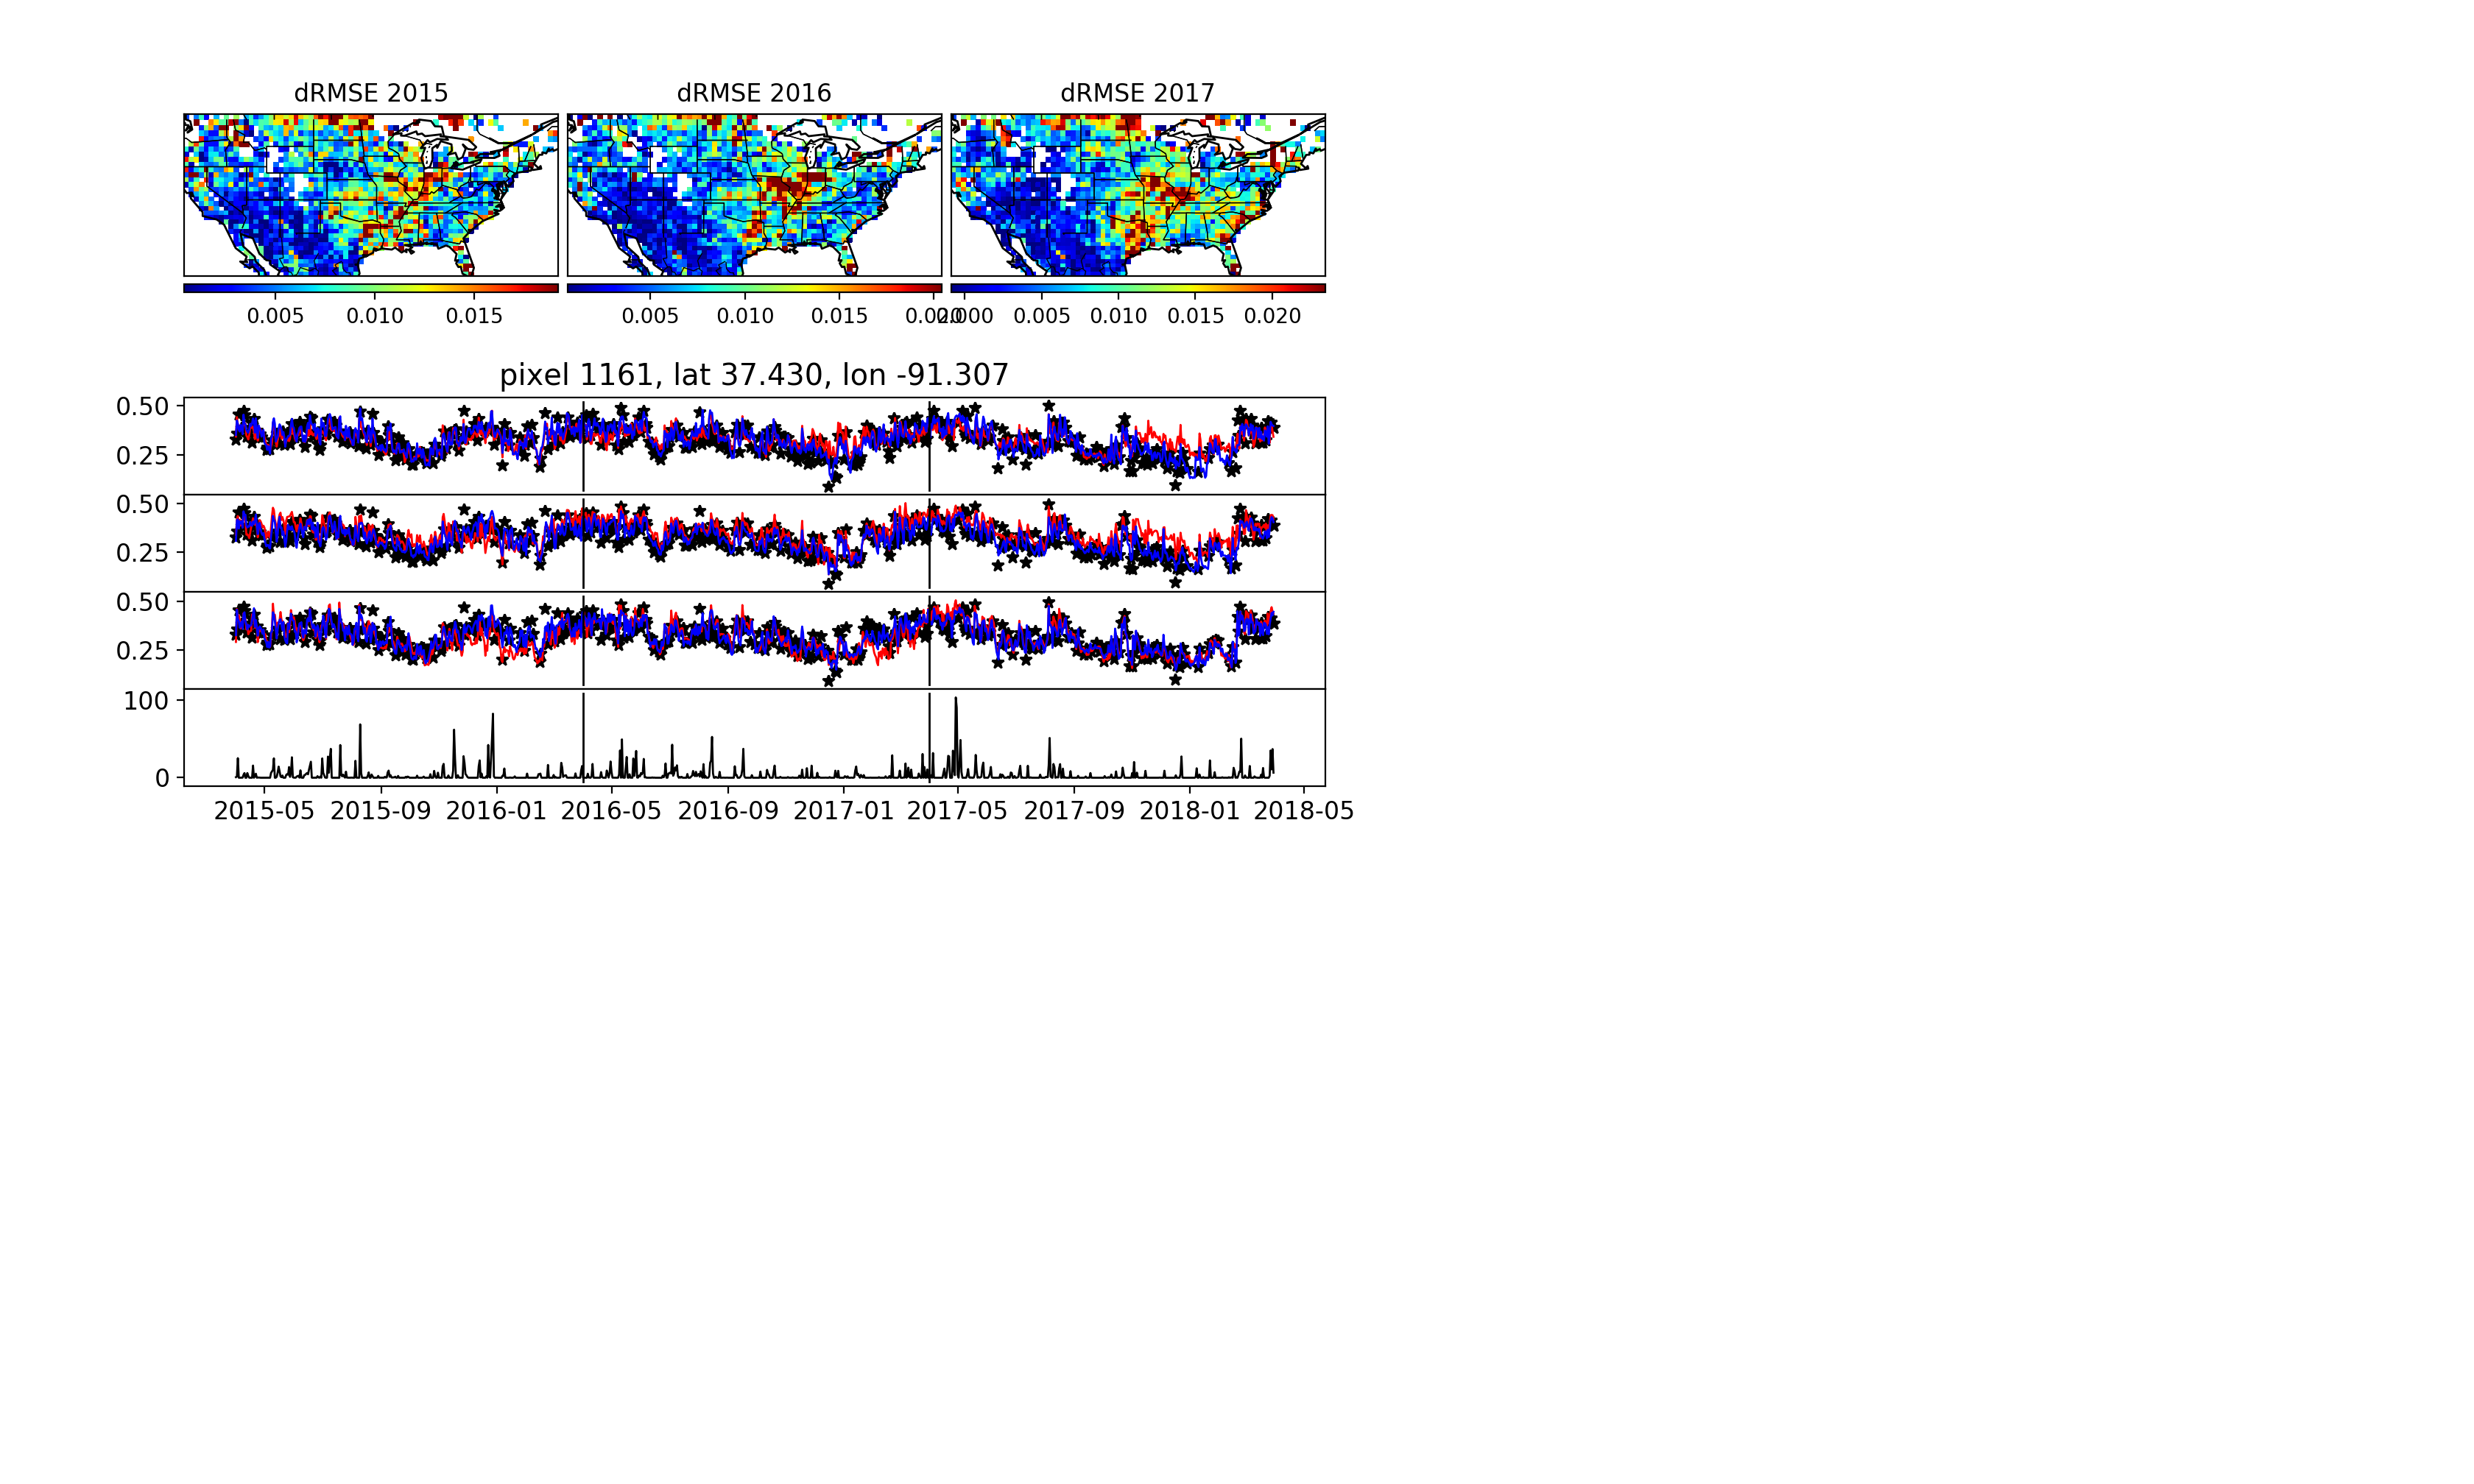

/home/kxf227/anaconda3/envs/pytorch/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


In [12]:
%matplotlib notebook
# plot map and time series
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams.update({'lines.linewidth': 0.8})
matplotlib.rcParams.update({'lines.markersize': 4})
matplotlib.rcParams.update({'legend.fontsize': 10})
import importlib
importlib.reload(plot)
dataGrid = [
    statPLst[0]['RMSE'] - statFLst[0]['RMSE'],
    statPLst[1]['RMSE'] - statFLst[1]['RMSE'],
    statPLst[2]['RMSE'] - statFLst[2]['RMSE']
]
prcp = df.getDataTs('APCP_FORA').squeeze()
dataTs = [[obs, ypLst[0], yfLst[0]], [obs, ypLst[1], yfLst[1]],
          [obs, ypLst[2], yfLst[2]], [prcp]]
crd = df.getGeo()
t = df.getT()
mapNameLst = ['dRMSE 2015', 'dRMSE 2016', 'dRMSE 2017']
tsNameLst = ['obs', 'prj', 'fore']
plot.plotTsMap(
    dataGrid,
    dataTs,
    figsize=[10,6],
    lat=crd[0],
    lon=crd[1],
    t=t,
    tBar=[utils.time.t2dt(20160401),
          utils.time.t2dt(20170401)],
    mapNameLst=mapNameLst,
    isGrid=True,
    multiTS=True)



<IPython.core.display.Javascript object>


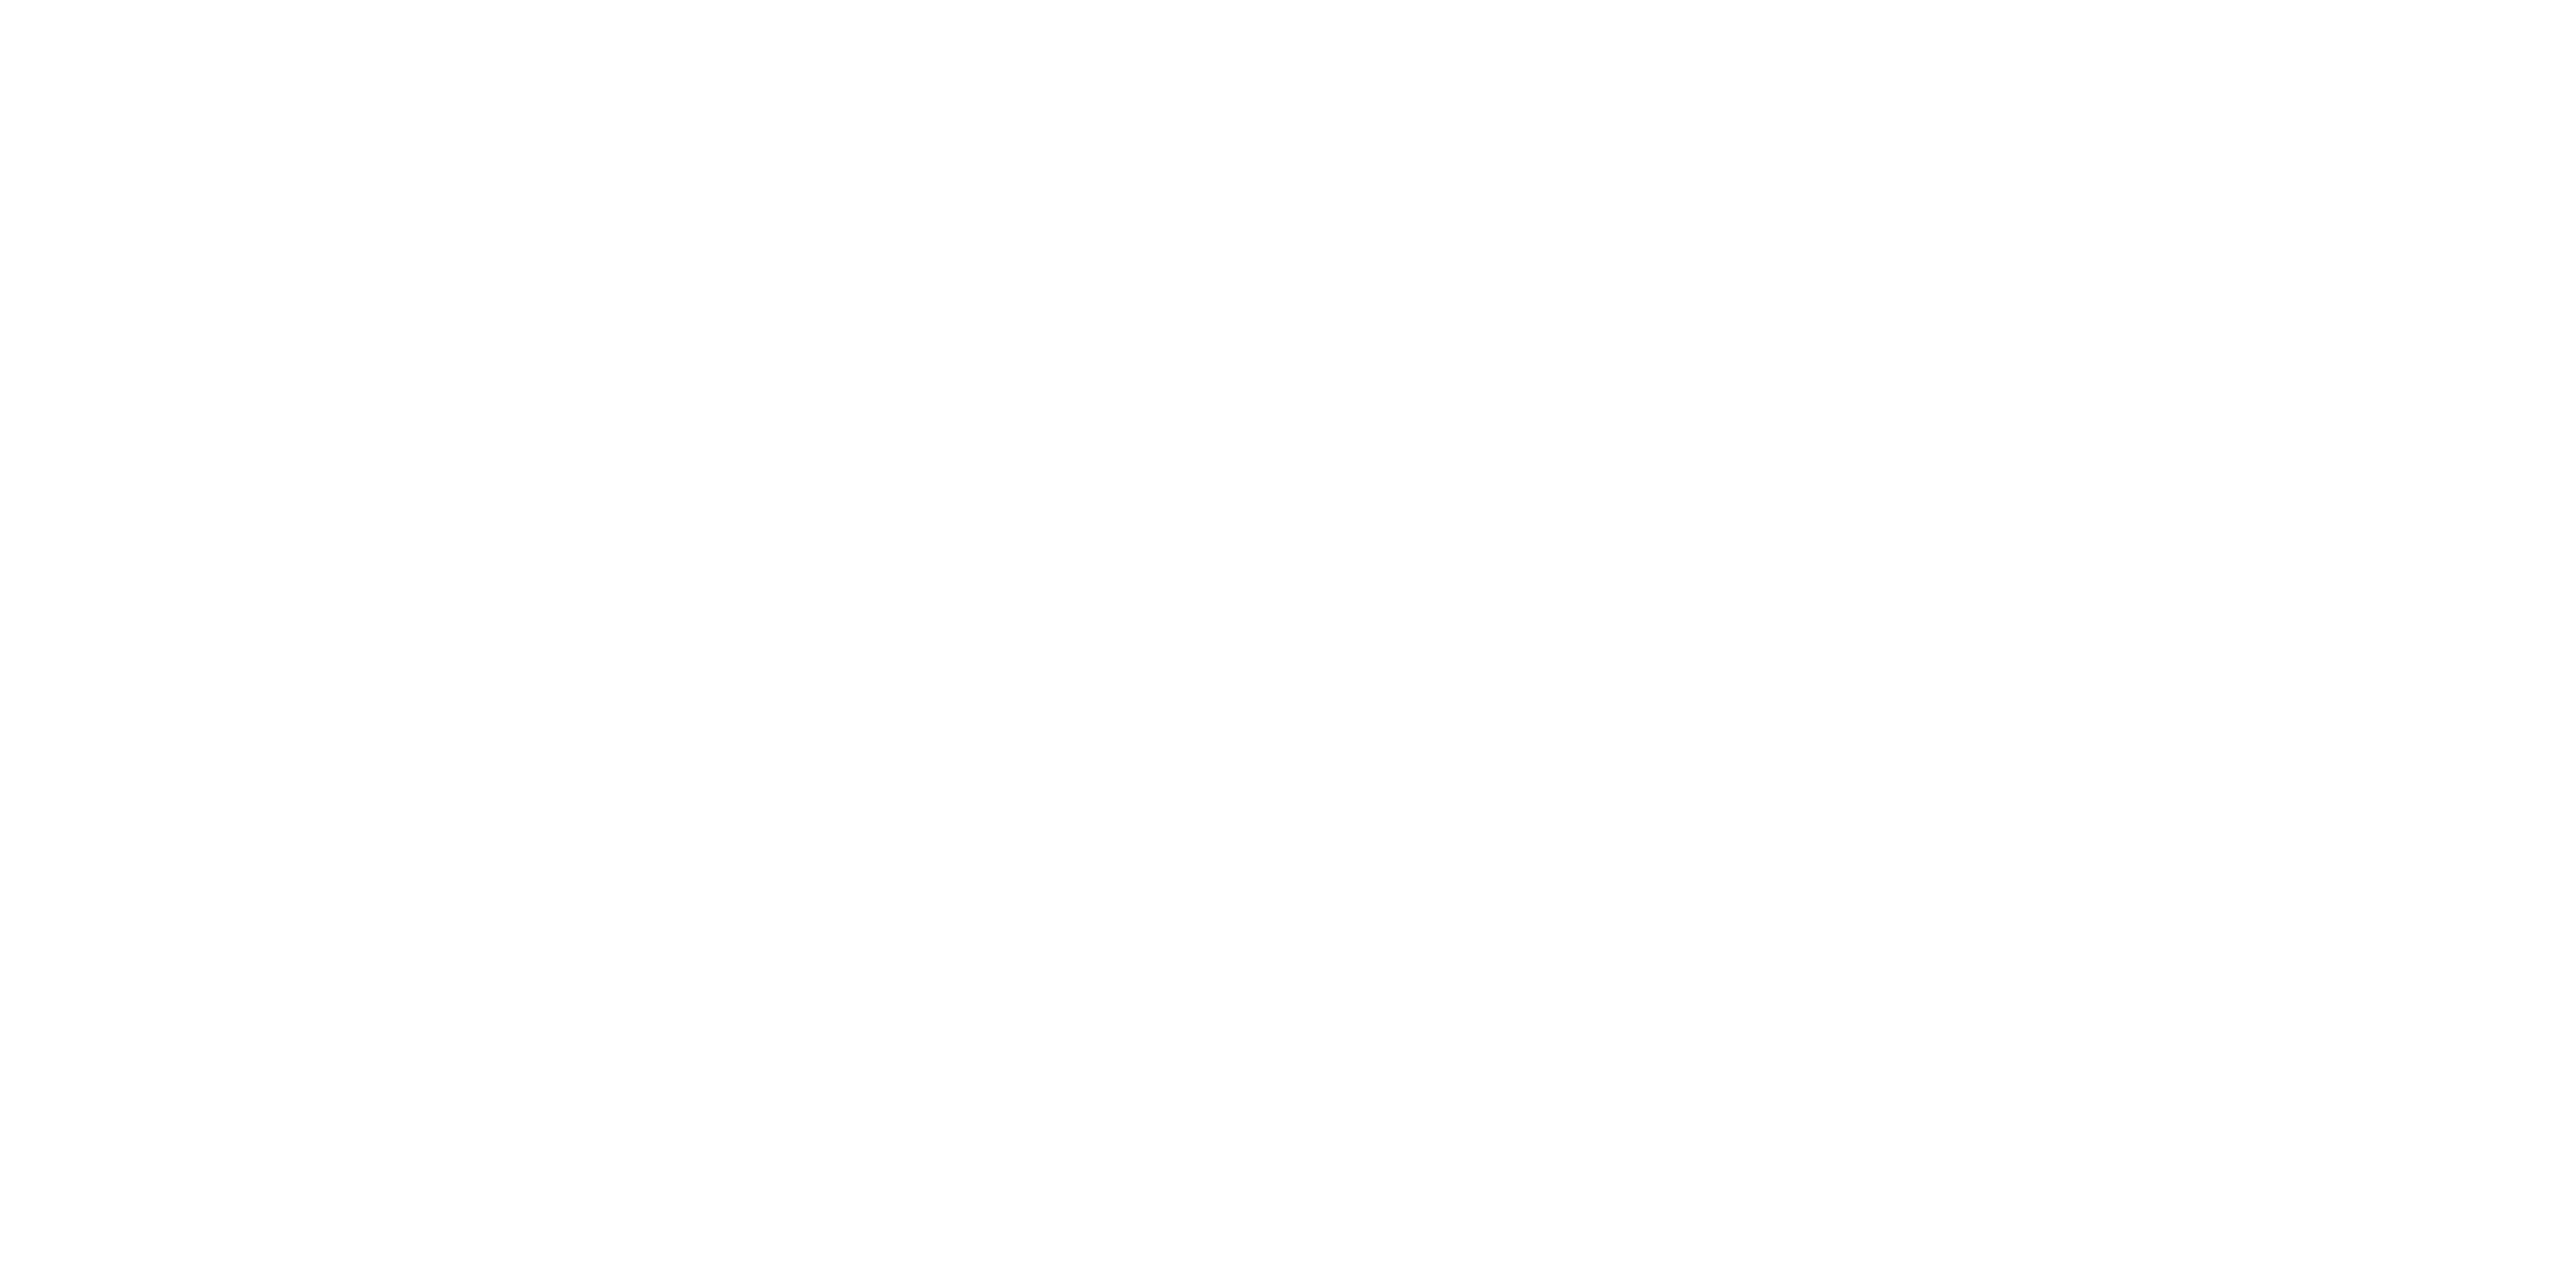

read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2015/APCP_FORA.csv 0.15842413902282715
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2016/APCP_FORA.csv 0.13393616676330566
read /mnt/sdc/rnnSMAP/Database_SMAPgrid/Daily_L3_NA/CONUSv2f1/2017/APCP_FORA.csv 0.13012313842773438


<IPython.core.display.Javascript object>


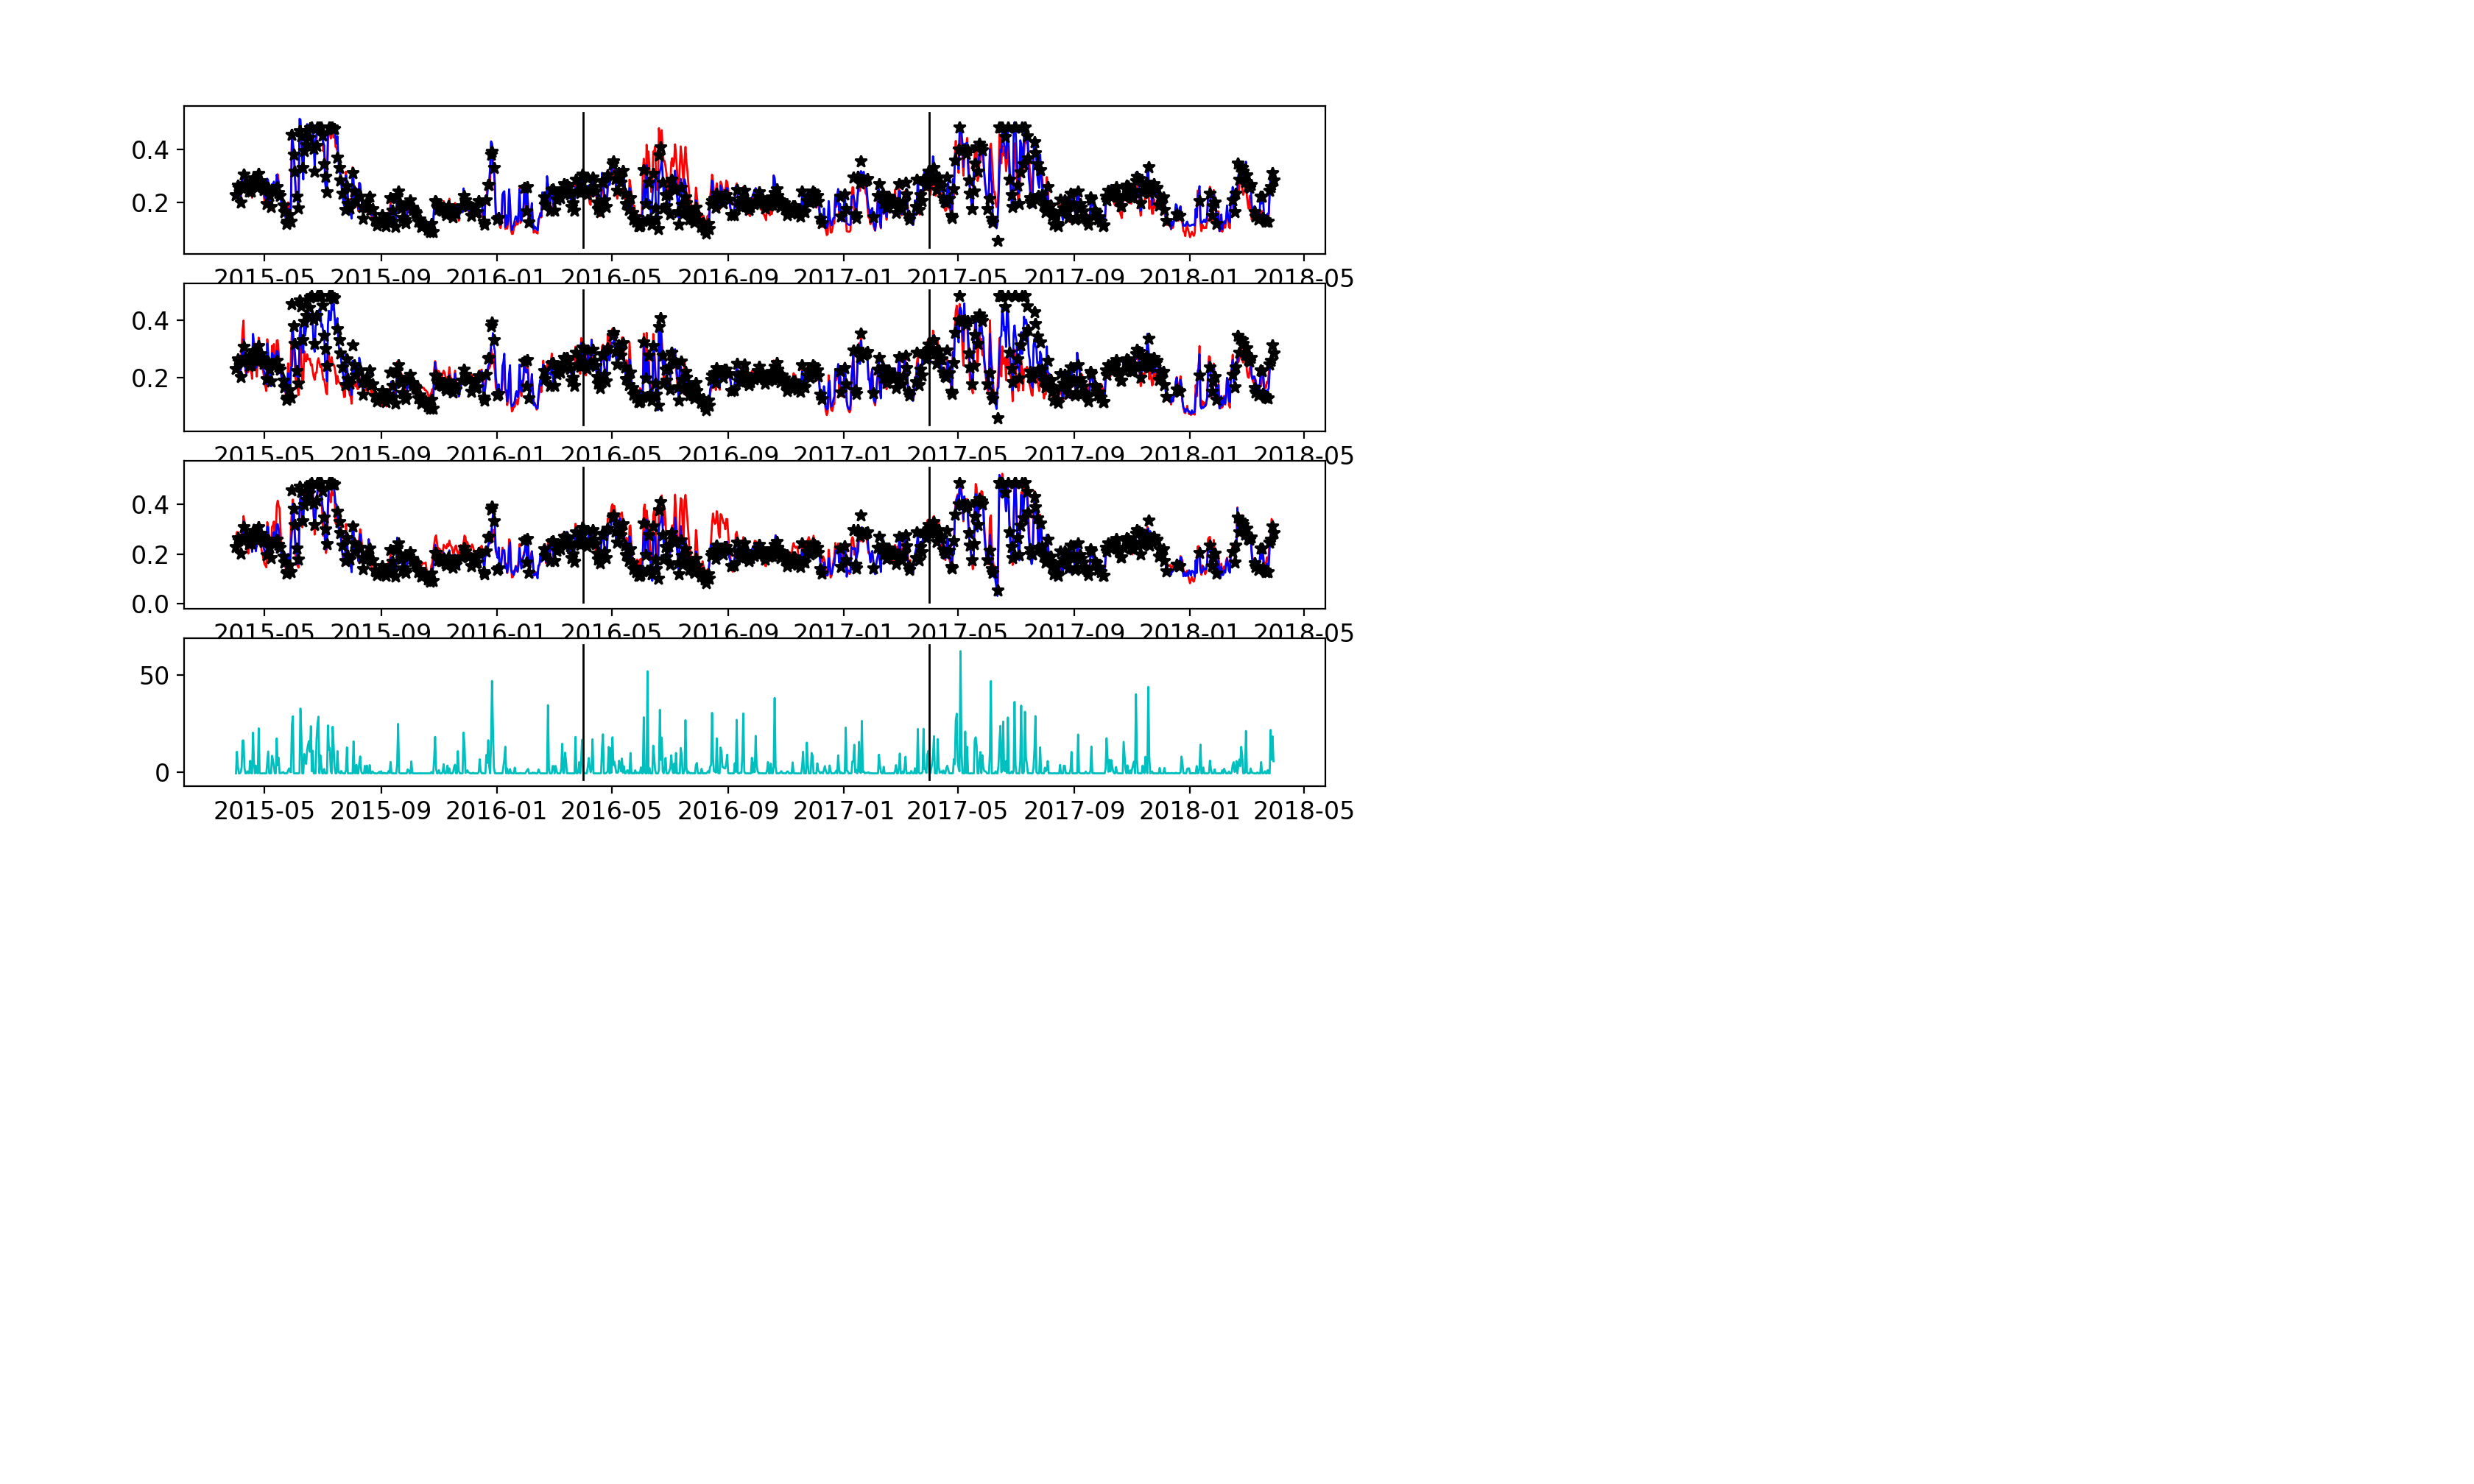

In [23]:

# plot pixel time series
import importlib
importlib.reload(plot)
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams.update({'lines.linewidth': 1})
matplotlib.rcParams.update({'lines.markersize': 6})
matplotlib.rcParams.update({'legend.fontsize': 12})
ind = 1298
tBar=[utils.time.t2dt(20160401), utils.time.t2dt(20170401)]
fig = plt.figure(figsize=[12, 6])
plt.subplots_adjust(hspace=0)
plt.subplots_adjust(wspace=0)
t = df.getT()
prcp = df.getDataTs('APCP_FORA').squeeze()

fig,axes=plt.subplots(4,1,figsize=(10,6))
legLst1 = None
legLst2 = None
for k in range(3):
    plot.plotTS(
        t, [ypLst[k][ind, :], yfLst[k][ind, :], obs[ind, :]],
        ax=axes[k],
        tBar=tBar,
        legLst=legLst1,
        linewidth=1)
plot.plotTS(
    t, [prcp[ind, :]],
    ax=axes[3],
    cLst='c',
    legLst=legLst2,
    tBar=tBar,
    linewidth=1)
fig.show()

fig.savefig(os.path.join(saveDir, 'ts_temp'))

In [ ]:

# plot pixel time series
import importlib
importlib.reload(plot)
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams.update({'lines.linewidth': 1})
matplotlib.rcParams.update({'lines.markersize': 6})
matplotlib.rcParams.update({'legend.fontsize': 12})
indLst = [1442, 1023]
indYLst = [0, 2]
nts = len(indLst)
hrLst = list()
for i in range(nts):
    hrLst = hrLst + [1, 0.7, 0.2]
del hrLst[-1]
gs = gridspec.GridSpec(nts * 3 - 1, 1, width_ratios=[1], height_ratios=hrLst)
fig = plt.figure(figsize=[12, 6])
plt.subplots_adjust(hspace=0)
plt.subplots_adjust(vspace=0)
t = df.getT()
prcp = df.getDataTs('APCP_FORA').squeeze()
tBarLst = [20160401, [20160401, 20170401], 20170401]
for k in range(nts):
    ind = indLst[k]
    indY = indYLst[k]
    ax = fig.add_subplot(gs[k * 3, 0])
    tBar = utils.time.t2dt(tBarLst[indY])
    if k == 0:
        legLst1 = ['project', 'forecast', 'SMAP']
        legLst2 = ['prcp']
    else:
        legLst1 = None
        legLst2 = None
    plot.plotTS(
        t, [ypLst[indY][ind, :], yfLst[indY][ind, :], obs[ind, :]],
        ax=ax,
        tBar=tBar,
        legLst=legLst1,
        linewidth=1)
    ax.set_xticklabels([])
    ax = fig.add_subplot(gs[k * 3 + 1, 0])
    plot.plotTS(
        t, [prcp[ind, :]],
        ax=ax,
        cLst='c',
        legLst=legLst2,
        tBar=tBar,
        linewidth=1)
fig.show()
fig.savefig(os.path.join(saveDir, 'ts_extreme.eps'))
fig.savefig(os.path.join(saveDir, 'ts_extreme'))